# HW 3
## Tim Demetriades
### AAI 695 WS2 - Shucheng Yu
3/9/2022

#### Use decision tree and random forest to train the titanic.csv dataset included in the assignment.
#### Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree    # alternative to graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_df = pd.read_csv("Titanic.csv")

Below are the first 5 samples.

In [3]:
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


We can see that several columns have many null values that we will have to fill. Additionally, there are several categorical columns that should be converted to numerical.

In [5]:
titanic_df.describe()

,Unnamed: 0,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758669,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329224,328.000000


Here we will turn the age and fare from categorical to numerical.

In [6]:
average_age = titanic_df.age.mean()
average_fare = titanic_df.fare.mean()

In [7]:
titanic_df.age.fillna(average_age, inplace = True)
titanic_df.fare.fillna(average_fare, inplace = True)

Here we replace these strings for the pclass column with integers.

In [8]:
titanic_df.pclass.unique()    # show all ticket classes

array(['1st', '2nd', '3rd'], dtype=object)

In [9]:
pclass_dict = {'1st': 1, '2nd': 2, '3rd': 3}

In [10]:
titanic_df.pclass.replace(pclass_dict, inplace = True)    # replace strings with ints

Finally we replace male with 0 and female with 1 and then split the set into a training set and a test set.

In [11]:
sex_dict = {'male': 0, 'female': 1}    # male = 0, female = 1

In [12]:
titanic_df.sex.replace(sex_dict, inplace = True)

In [13]:
train_df, test_df = train_test_split(titanic_df,  test_size = 0.2, random_state = 42)

#### Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

First the features and labels are split for the training and test data.

In [14]:
X = train_df[['pclass', 'sex', 'age', 'sibsp']]
X_test = test_df[['pclass', 'sex', 'age', 'sibsp']]
y = train_df['survived']
y_test = test_df['survived']

In [15]:
X

,pclass,sex,age,sibsp
772,3,0,17.000000,0
543,2,0,36.000000,0
289,1,1,18.000000,0
10,1,0,47.000000,1
147,1,0,29.881135,0
...,...,...,...,...
1095,3,1,29.881135,0
1130,3,1,18.000000,0
1294,3,0,28.500000,0
860,3,1,26.000000,0


Here a basic Decision Tree is made with no parameters (no pruning).

In [16]:
titanic_tree = DecisionTreeClassifier()                                  

In [17]:
titanic_tree.fit(X, y)

DecisionTreeClassifier()

In [18]:
export_graphviz(titanic_tree,
                out_file = 'titanic_tree.dot',
                feature_names = X.columns,
                class_names = ['0', '1'],
                rounded = True,
                filled = True)

Here we also make a pruned tree with max depth set to 3 to show what that looks like in comparison to the other tree.

In [19]:
titanic_tree_pruned = DecisionTreeClassifier(max_depth = 3)   

In [20]:
titanic_tree_pruned.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [21]:
export_graphviz(titanic_tree_pruned,
                out_file = 'titanic_tree_pruned.dot',
                feature_names = X.columns,
                class_names = ['0', '1'],
                rounded = True,
                filled = True)

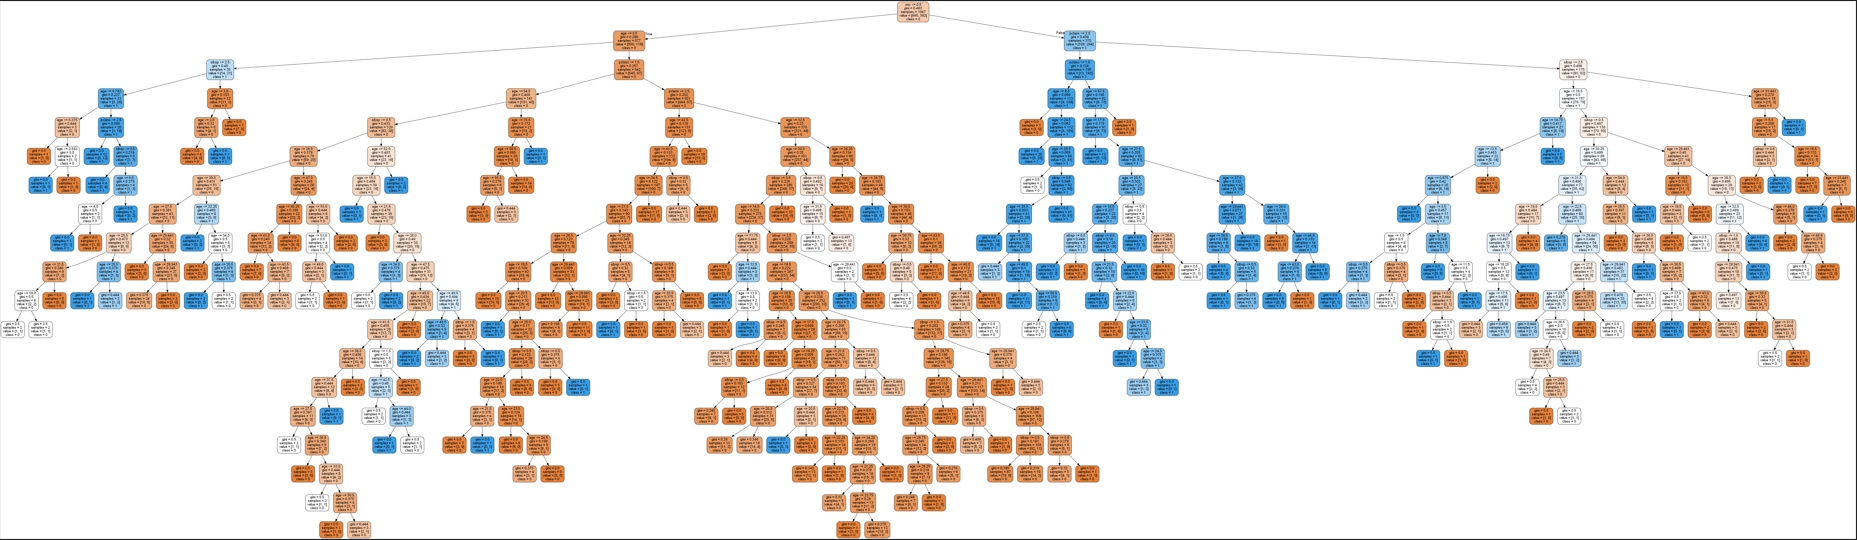

Above is the full decision tree created using the four features 'pclass', 'sex', 'age', 'sibsp'. As can be seen even with just these four features the tree is massive and is likely overfitting the data. This is why pruning the tree is so important.

Below is what a pruned tree looks like with max depth set to 3.

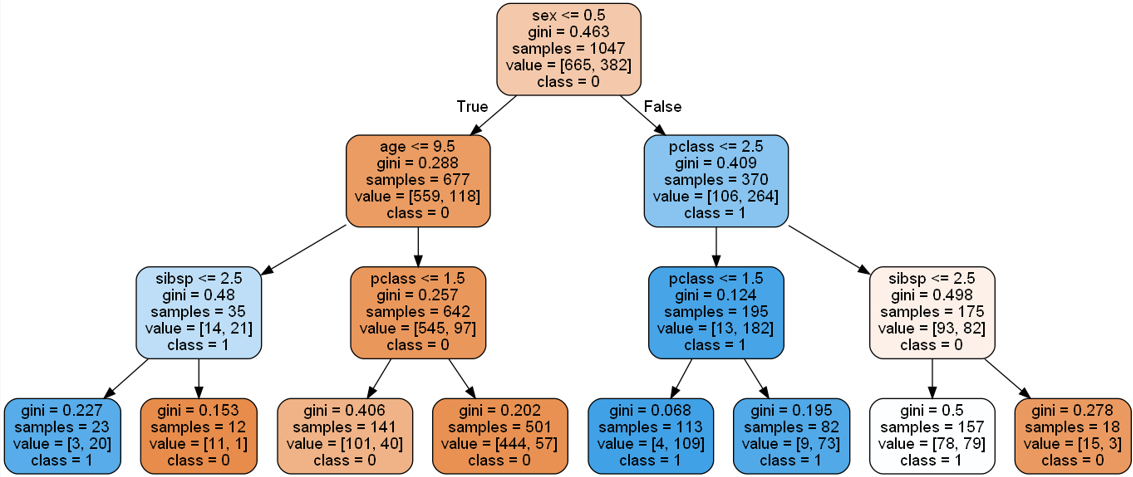

#### Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2. 

In [22]:
param_grid = [{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

Here the grid search is setup to find the best number of max leaf nodes.

In [23]:
titanic_tree_grid_search = DecisionTreeClassifier()
grid_search = GridSearchCV(titanic_tree_grid_search,
                           param_grid,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

In [24]:
grid_search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'max_leaf_nodes': 7}

In [26]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.4625653845883484 {'max_leaf_nodes': 2}
0.46361826992155747 {'max_leaf_nodes': 3}
0.45636182996068725 {'max_leaf_nodes': 4}
0.44791102687108414 {'max_leaf_nodes': 5}
0.44791102687108414 {'max_leaf_nodes': 6}
0.4479008532023408 {'max_leaf_nodes': 7}
0.45214861345457535 {'max_leaf_nodes': 8}
0.4510942115528795 {'max_leaf_nodes': 9}
0.4532005622252426 {'max_leaf_nodes': 10}


As can be seen above, the RMSE score when max leaf nodes is set to 7 is about 0.447901, which is the lowest and therefore the best.

Let's make a decision tree with this.

In [27]:
titanic_tree_max_leaf_nodes_7 = DecisionTreeClassifier(max_leaf_nodes = 7)
titanic_tree_max_leaf_nodes_7.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=7)

In [28]:
export_graphviz(titanic_tree_max_leaf_nodes_7,
                out_file = 'titanic_tree_max_leaf_nodes_7.dot',
                feature_names = X.columns,
                class_names = ['0', '1'],
                rounded = True,
                filled = True)

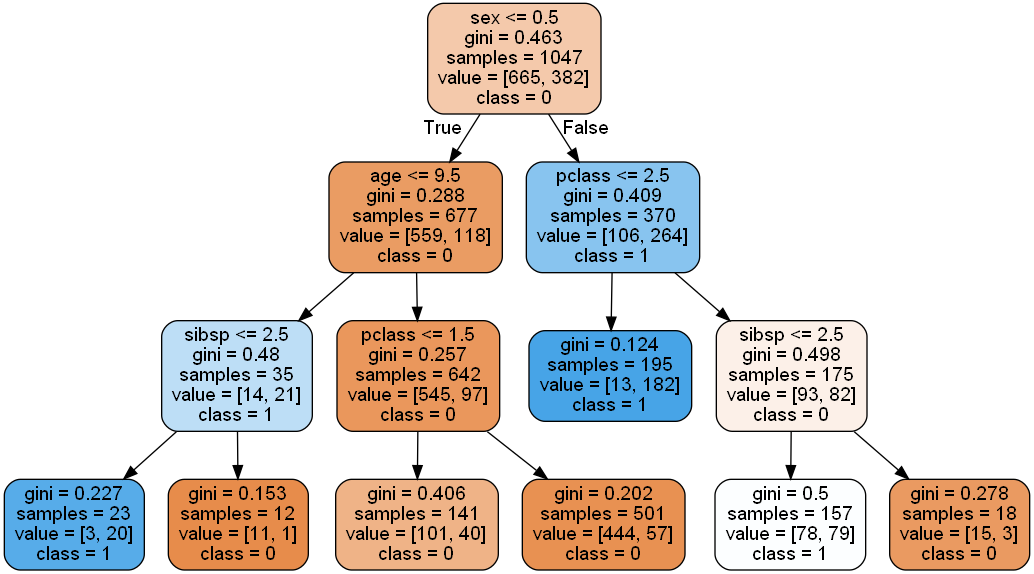

#### Step 4: For the pruned tree, report its accuracy on the test set for the following: 
#### - percent survivors correctly predicted (on test set) 
#### - percent fatalities correctly predicted (on test set)

We can get the prediction the pruned tree calculates on the test data. Then, we can compare the prediction with the actual values to see how well it performs.

In [29]:
prediction = titanic_tree_max_leaf_nodes_7.predict(X_test)

In [30]:
num_survivors_prediction = np.sum((prediction == 1) & (y_test == 1))
num_survivors_actual = np.count_nonzero(y_test)

In [31]:
survivors_accuracy = num_survivors_prediction / num_survivors_actual
print(f'Percent Survivors Correctly Predicted: {survivors_accuracy:.2%}')

Percent Survivors Correctly Predicted: 66.95%


In [32]:
num_fatalities_prediction = np.sum((prediction == 0) & (y_test == 0))
num_fatalities_actual = len(y_test) - np.count_nonzero(y_test)

In [33]:
fatalities_accuracy = num_fatalities_prediction / num_fatalities_actual
fatalities_accuracy
print(f'Percent Fatalities Correctly Predicted: {fatalities_accuracy:.2%}')

Percent Fatalities Correctly Predicted: 87.50%


#### Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:
#### - percent survivors correctly predicted (on test set)
#### - percent fatalities correctly predicted (on test set)
#### Check whether there is improvement as compared to a single tree obtained in Step 4.

Below is random forest is created and fit with the training data.

In [34]:
titanic_random_forest = RandomForestClassifier(n_estimators = 50,
                                               max_leaf_nodes = 7)
titanic_random_forest.fit(X, y)

RandomForestClassifier(max_leaf_nodes=7, n_estimators=50)

A prediction is calculated with the model so the accuracy can be retrieved.

In [35]:
rf_prediction = titanic_random_forest.predict(X_test)

In [36]:
rf_num_survivors_prediction = np.sum((rf_prediction == 1) & (y_test == 1))
rf_num_survivors_actual = np.count_nonzero(y_test)

In [37]:
rf_survivors_accuracy = rf_num_survivors_prediction / rf_num_survivors_actual
print(f'Percent Survivors Correctly Predicted: {rf_survivors_accuracy:.2%}')

Percent Survivors Correctly Predicted: 50.00%


In [38]:
rf_num_fatalities_prediction = np.sum((rf_prediction == 0) & (y_test == 0))
rf_num_fatalities_actual = len(y_test) - np.count_nonzero(y_test)

In [39]:
rf_fatalities_accuracy = rf_num_fatalities_prediction / rf_num_fatalities_actual
print(f'Percent Fatalities Correctly Predicted: {rf_fatalities_accuracy:.2%}')

Percent Fatalities Correctly Predicted: 95.83%


As can be seen above, while the accuracy for the number of survivors correctly predicted has decreased, the accuracy for the number of fatalies correctly predicted has increased to over 95%. For the most part, random forests tend to generalize over the data in better way to prevent overfitting and in doing so tend to have a higher accuracy on the test data as the variance has decreased. This is partially true here, where the survivor accuracy has decreased but the fatality accuracy has increased. So depending on the use case needed, either decision tree or random forest could be the better model. 